##  SLR using Delivery_time_data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [34]:
data= pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA & Data visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


array([[<AxesSubplot:title={'center':'dt'}>,
        <AxesSubplot:title={'center':'st'}>]], dtype=object)

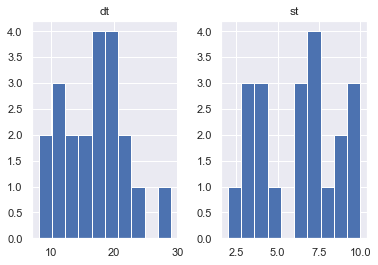

In [60]:
data.info()
data.hist()

In [61]:
data=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [62]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

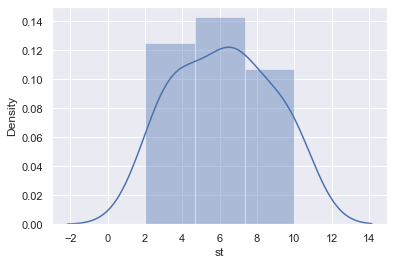

In [39]:
sns.distplot(data['st'])

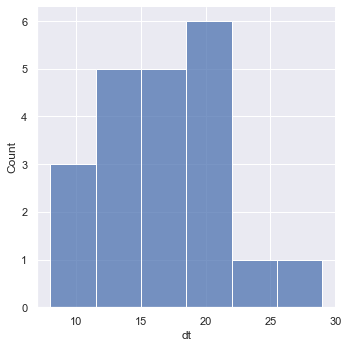

In [40]:
sns.displot(data['dt'])

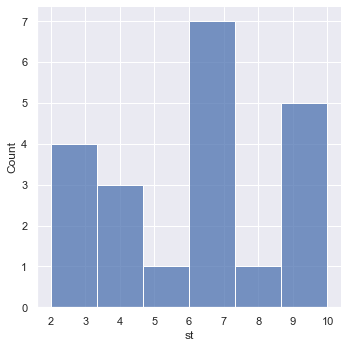

In [41]:
sns.displot(data['st'])

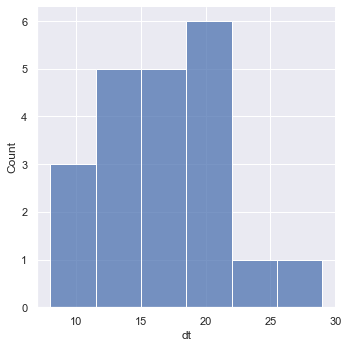

In [42]:
sns.displot(data['dt'])

In [43]:
df= data.drop(data.index[[10,20]],axis=0)

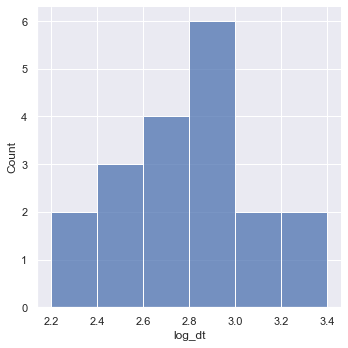

In [44]:
#Apply Log_transformation to get gaussian distribution
df['log_dt']= np.log(df['dt']+1)
#Using log_transformation we see the data is normally distributed
sns.displot(df['log_dt'])

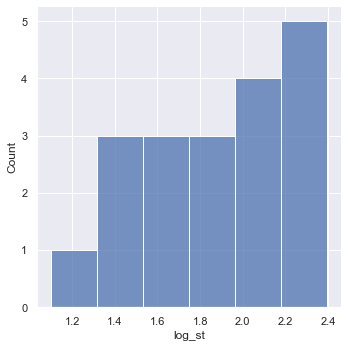

In [45]:
#Apply Log_transformation to get gaussian distribution
df['log_st']= np.log(df['st']+1)
#Using log_transformation we get left skewed data
sns.displot(df['log_st'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqr_dt', ylabel='Density'>

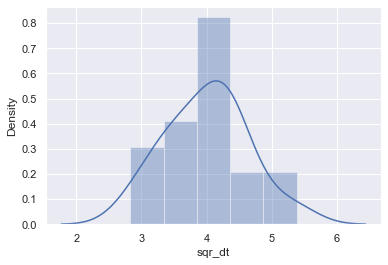

In [46]:
#We try some extra transformation to see weather the data get normally distributed or not
#Square_root Transformation
df['sqr_dt'] = df['dt']**(1/2)
#We get some what bell shaped here
sns.distplot(df['sqr_dt'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqr_st', ylabel='Density'>

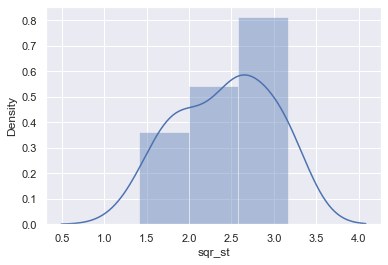

In [47]:
#We try some extra transformation to see weather the data get normally distributed or not
#Square_root Transformation
df['sqr_st'] = df['st']**(1/2)
#We get some what bell shaped here
sns.distplot(df['sqr_st'])

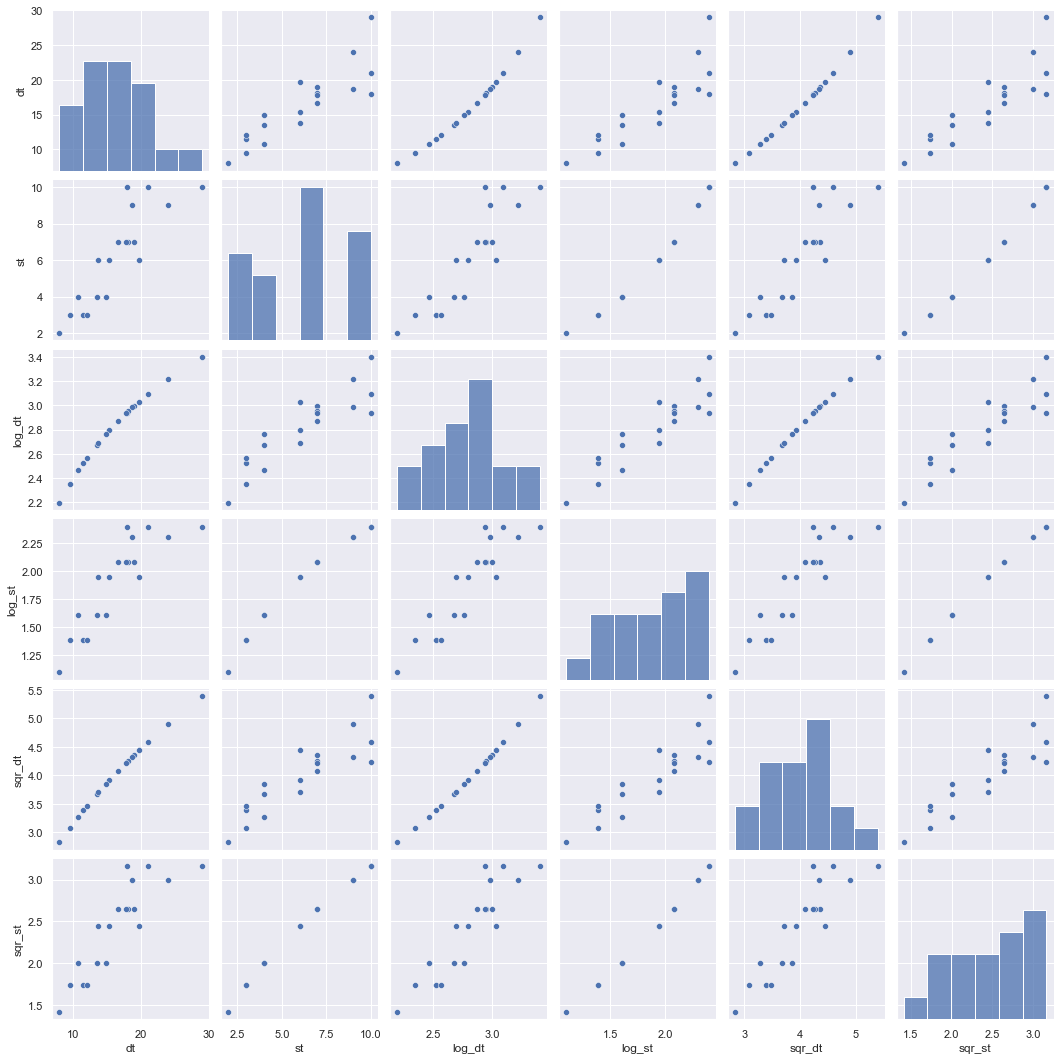

In [48]:
sns.pairplot(df)

<AxesSubplot:xlabel='log_st', ylabel='log_dt'>

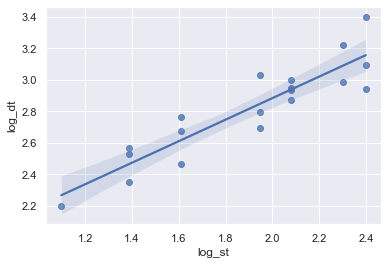

In [49]:
sns.regplot(x="log_st",y="log_dt",data=df)

In [50]:
df.corr()

,dt,st,log_dt,log_st,sqr_dt,sqr_st
dt,1.000000,0.870628,0.982574,0.867936,0.995007,0.872088
st,0.870628,1.000000,0.888411,0.985205,0.884683,0.994809
log_dt,0.982574,0.888411,1.000000,0.907848,0.996199,0.903047
log_st,0.867936,0.985205,0.907848,1.000000,0.893628,0.997526
sqr_dt,0.995007,0.884683,0.996199,0.893628,1.000000,0.893096
sqr_st,0.872088,0.994809,0.903047,0.997526,0.893096,1.000000


In [51]:
model = smf.ols("log_dt~log_st",data =df).fit()

In [52]:
model.params

Intercept    1.513663
log_st       0.685078
dtype: float64

In [53]:
model.summary()

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_dt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     79.69
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           7.95e-08
Time:                        12:07:34   Log-Likelihood:                 12.794
No. Observations:                  19   AIC:                            -21.59
Df Residuals:                      17   BIC:                            -19.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5137      0.149     10.185      0.000       1.200       1.827
log_st         0.6851      0.077      8.927      0.000       0.523       0.847
==============================================================================
Omnibus:                        0.758   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.713
Skew:                           0.195   Prob(JB):                        0.700
Kurtosis:                       2.135   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
newdata=pd.Series([10,4])
data_pred=pd.DataFrame(newdata,columns=['log_st'])

In [55]:
pred_=model.predict(data_pred)

In [56]:
check_ = np.mean((pred_ - data_pred)**0.5)
check_

log_st   NaN
0        NaN
1        NaN
dtype: float64

In [57]:
newdata1=pd.Series([2.39,1.60])
data_pred1 = pd.DataFrame(newdata1,columns=['log_st'])
data_pred1

,log_st
0,2.39
1,1.60


In [58]:
model.predict(data_pred1)

0    3.151000
1    2.609788
dtype: float64

In [59]:
df

,dt,st,log_dt,log_st,sqr_dt,sqr_st
0,21.00,10,3.091042,2.397895,4.582576,3.162278
1,13.50,4,2.674149,1.609438,3.674235,2.000000
2,19.75,6,3.032546,1.945910,4.444097,2.449490
3,24.00,9,3.218876,2.302585,4.898979,3.000000
4,29.00,10,3.401197,2.397895,5.385165,3.162278
5,15.35,6,2.794228,1.945910,3.917908,2.449490
6,19.00,7,2.995732,2.079442,4.358899,2.645751
7,9.50,3,2.351375,1.386294,3.082207,1.732051
8,17.90,10,2.939162,2.397895,4.230839,3.162278
9,18.75,9,2.983153,2.302585,4.330127,3.000000
